# Data Preprocessing 

In [107]:
import pandas as pd
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [108]:
# Read Covid Confirmed Cases data from CSV
confirm = pd.read_csv(r"C:\Users\USER\Desktop\Covid-19 Data set\time_series_covid19_confirmed_global.csv")

In [109]:
confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,158381,158394,158471,158511,158602,158639,158678,158717,158826,158974
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,219694,220487,222664,224569,226598,228777,230940,232637,233654,236486
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,222157,222639,223196,223806,224383,224979,225484,226057,226749,227559
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,26408,27983,28542,28899,28899,29888,29888,29888,29888,29888
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,89718,90316,91148,91907,92581,93302,93524,93694,93974,94275


In [110]:
confirm.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '1/9/22', '1/10/22', '1/11/22', '1/12/22', '1/13/22', '1/14/22',
       '1/15/22', '1/16/22', '1/17/22', '1/18/22'],
      dtype='object', length=732)

In [111]:
# Reshaping Data Sets
dates = confirm.columns[4:]

In [112]:
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '1/9/22', '1/10/22', '1/11/22', '1/12/22', '1/13/22', '1/14/22',
       '1/15/22', '1/16/22', '1/17/22', '1/18/22'],
      dtype='object', length=728)

In [113]:
# unpivoted DataFrame from wide format to long format
confirm_df_long = confirm.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Confirmed'
)

In [114]:
confirm_df_long

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
203835,NaN,Vietnam,14.058324,108.277199,1/18/22,2062128
203836,NaN,West Bank and Gaza,31.952200,35.233200,1/18/22,477151
203837,NaN,Yemen,15.552727,48.516388,1/18/22,10408
203838,NaN,Zambia,-13.133897,27.849332,1/18/22,298032


In [115]:
# Convert String Date Time Into Python Date Time Object.
confirm_df_long['Date'] = pd.to_datetime(confirm_df_long['Date'])

In [116]:
confirm_df_long

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0
...,...,...,...,...,...,...
203835,NaN,Vietnam,14.058324,108.277199,2022-01-18,2062128
203836,NaN,West Bank and Gaza,31.952200,35.233200,2022-01-18,477151
203837,NaN,Yemen,15.552727,48.516388,2022-01-18,10408
203838,NaN,Zambia,-13.133897,27.849332,2022-01-18,298032


In [117]:
confirm_df_long.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
dtype: object

In [118]:
confirm_df_long.drop(["Province/State", "Lat","Long"], axis = 1, inplace = True)

In [119]:
confirm_df_long

,Country/Region,Date,Confirmed
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0
...,...,...,...
203835,Vietnam,2022-01-18,2062128
203836,West Bank and Gaza,2022-01-18,477151
203837,Yemen,2022-01-18,10408
203838,Zambia,2022-01-18,298032


In [120]:
# Accessed Bangladesh Confirmed_cases data by Label(s)
Bangladesh_confirmed_cases = confirm_df_long.set_index("Country/Region")
df_confirmed_cases = Bangladesh_confirmed_cases.loc['Bangladesh', 'Date':'Confirmed']

In [121]:
df_confirmed_cases

,Date,Confirmed
Country/Region,,
Bangladesh,2020-01-22,0
Bangladesh,2020-01-23,0
Bangladesh,2020-01-24,0
Bangladesh,2020-01-25,0
Bangladesh,2020-01-26,0
...,...,...
Bangladesh,2022-01-14,1609042
Bangladesh,2022-01-15,1612489
Bangladesh,2022-01-16,1617711


In [122]:
df_confirmed_cases = (df_confirmed_cases.assign(new_cases = df_confirmed_cases.Confirmed.diff()))

In [123]:
df_confirmed_cases

,Date,Confirmed,new_cases
Country/Region,,,
Bangladesh,2020-01-22,0,NaN
Bangladesh,2020-01-23,0,0.0
Bangladesh,2020-01-24,0,0.0
Bangladesh,2020-01-25,0,0.0
Bangladesh,2020-01-26,0,0.0
...,...,...,...
Bangladesh,2022-01-14,1609042,4378.0
Bangladesh,2022-01-15,1612489,3447.0
Bangladesh,2022-01-16,1617711,5222.0


In [124]:
df_confirmed_cases.isna().sum()

Date         0
Confirmed    0
new_cases    1
dtype: int64

In [125]:
# filling na with 0
df_confirmed_cases = df_confirmed_cases.fillna(0)

In [126]:
df_confirmed_cases

,Date,Confirmed,new_cases
Country/Region,,,
Bangladesh,2020-01-22,0,0.0
Bangladesh,2020-01-23,0,0.0
Bangladesh,2020-01-24,0,0.0
Bangladesh,2020-01-25,0,0.0
Bangladesh,2020-01-26,0,0.0
...,...,...,...
Bangladesh,2022-01-14,1609042,4378.0
Bangladesh,2022-01-15,1612489,3447.0
Bangladesh,2022-01-16,1617711,5222.0


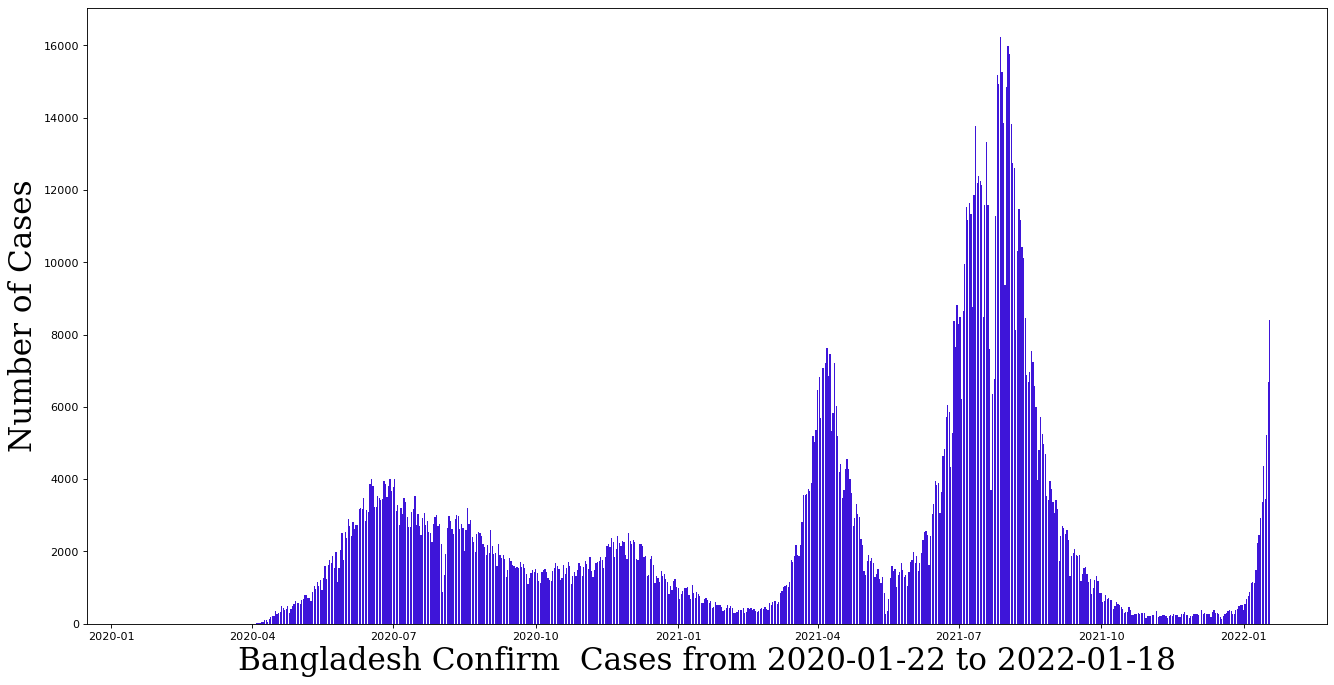

In [127]:
date= df_confirmed_cases['Date']
total_case= df_confirmed_cases['new_cases']
plt.figure(figsize=(20, 10), dpi=80)

plt.bar(date,total_case,color='#3e15d9', linestyle = 'dotted', linewidth = '2.5')
font1 = {'family':'serif','color':'black','size':28}
plt.xlabel("Bangladesh Confirm  Cases from 2020-01-22 to 2022-01-18", fontdict = font1)
plt.ylabel("Number of Cases", fontdict = font1)
plt.show() 

In [128]:
cv_75_days_dataset = df_confirmed_cases.loc[(df_confirmed_cases['Date'] >= '2021-05-08')
                     & (df_confirmed_cases['Date'] < '2021-07-22')]

In [129]:
cv_75_days_dataset

,Date,Confirmed,new_cases
Country/Region,,,
Bangladesh,2021-05-08,772127,1285.0
Bangladesh,2021-05-09,773513,1386.0
Bangladesh,2021-05-10,775027,1514.0
Bangladesh,2021-05-11,776257,1230.0
Bangladesh,2021-05-12,777397,1140.0
...,...,...,...
Bangladesh,2021-07-17,1092411,8489.0
Bangladesh,2021-07-18,1103989,11578.0
Bangladesh,2021-07-19,1117310,13321.0


In [130]:
#cv_75_days_dataset['Day'] = np.arange(len(cv_75_days_dataset.index))
#cv_75_days_dataset = cv_75_days_dataset.set_index("Date")

In [131]:
cv_75_days_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, Bangladesh to Bangladesh
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       75 non-null     datetime64[ns]
 1   Confirmed  75 non-null     int64         
 2   new_cases  75 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.3+ KB


In [132]:
cv_75_days_dataset

,Date,Confirmed,new_cases
Country/Region,,,
Bangladesh,2021-05-08,772127,1285.0
Bangladesh,2021-05-09,773513,1386.0
Bangladesh,2021-05-10,775027,1514.0
Bangladesh,2021-05-11,776257,1230.0
Bangladesh,2021-05-12,777397,1140.0
...,...,...,...
Bangladesh,2021-07-17,1092411,8489.0
Bangladesh,2021-07-18,1103989,11578.0
Bangladesh,2021-07-19,1117310,13321.0


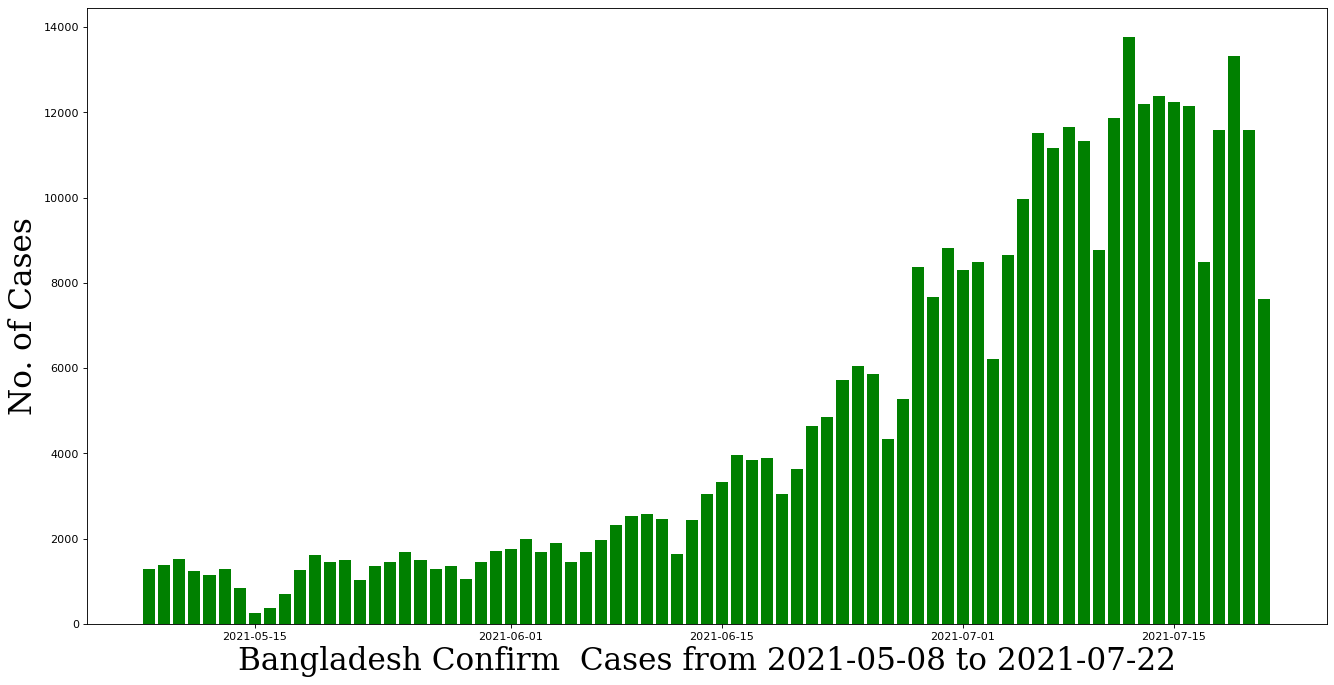

In [133]:
date= cv_75_days_dataset['Date']
total_case= cv_75_days_dataset['new_cases']
plt.figure(figsize=(20, 10), dpi=80)
plt.bar(date,total_case,color='g')
plt.xlabel("Bangladesh Confirm  Cases from 2021-05-08 to 2021-07-22", fontdict = font1)
plt.ylabel("No. of Cases", fontdict = font1)
plt.show()
